# Perform benchmarking on `non-cancer_illness` mapping from the paper vs Medcat

## Read and format source files

### Read Athena Vocabulary

In [1]:
import pandas as pd

athenaDf = pd.read_csv('/superbugai-data/yash/temp/trained_vocs/CONCEPT.csv', sep='\t', dtype=str)
athenaDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
0,1146945,concept.concept_id,Metadata,CDM,Field,S,CDM1,20141111,20991231,NaN
1,1146954,concept.invalid_reason,Metadata,CDM,Field,S,CDM10,20141111,20991231,NaN
2,1147044,observation_period.observation_period_id,Metadata,CDM,Field,S,CDM100,20141111,20991231,NaN
3,1147045,observation_period.person_id,Metadata,CDM,Field,S,CDM101,20141111,20991231,NaN
4,1147046,observation_period.observation_period_start_date,Metadata,CDM,Field,S,CDM102,20141111,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...
3291595,32918,Human Gene Nomenclature (European Bioinformati...,Metadata,Vocabulary,Vocabulary,NaN,OMOP generated,19700101,20991231,NaN
3291596,32771,CAP electronic Cancer Checklists (College of A...,Metadata,Vocabulary,Vocabulary,NaN,OMOP generated,19700101,20991231,NaN
3291597,32928,"International Classification of Diseases, Tent...",Metadata,Vocabulary,Vocabulary,NaN,OMOP generated,19700101,20991231,NaN
3291598,32929,Diagnostic Modifiers of Cancer (OMOP),Metadata,Vocabulary,Vocabulary,NaN,OMOP generated,19700101,20991231,NaN


In [2]:
import pandas as pd

athenaAncestorDf = pd.read_csv('/superbugai-data/yash/temp/trained_vocs/CONCEPT_ANCESTOR.csv', sep='\t', dtype=str)
athenaAncestorDf

,ancestor_concept_id,descendant_concept_id,min_levels_of_separation,max_levels_of_separation
0,375415,4335743,4,4
1,135473,4222590,2,2
2,381591,318137,2,2
3,436670,4301266,2,4
4,441840,4161437,4,4
...,...,...,...,...
17555172,3667297,3667297,0,0
17555173,3667298,3667298,0,0
17555174,3667301,3667301,0,0
17555175,3667304,3667304,0,0


### Filter the required ontology from Athena Vocabulary

In [3]:
snomedConditionDf = athenaDf[
    athenaDf.invalid_reason.isna()
    & (athenaDf.standard_concept == 'S')
    & (athenaDf.vocabulary_id == 'SNOMED')
    & (athenaDf.domain_id == 'Condition')
    & (athenaDf.concept_class_id == 'Clinical Finding')
    ]
snomedConditionDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
2254914,43530605,Pulmonary embolism with pulmonary infarction,Condition,SNOMED,Clinical Finding,S,1001000119102,20130731,20991231,NaN
2254915,45757048,Asymmetry of prostate,Condition,SNOMED,Clinical Finding,S,100191000119105,20150131,20991231,NaN
2254916,46269689,Muscle spasm of thoracic back,Condition,SNOMED,Clinical Finding,S,100211000119106,20150731,20991231,NaN
2254917,36712666,Acquired pericardial cyst,Condition,SNOMED,Clinical Finding,S,100231000119101,20170131,20991231,NaN
2254918,37016098,Myelopathy due to spinal stenosis of lumbar re...,Condition,SNOMED,Clinical Finding,S,100491000119103,20160131,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...
3271658,3663265,Sprain of ulnar carpal complex ligament,Condition,SNOMED,Clinical Finding,S,870768000,20200731,20991231,NaN
3271659,3663266,Presenting part of fetus not engaged,Condition,SNOMED,Clinical Finding,S,871478009,20200731,20991231,NaN
3271669,3663278,Acquired abnormality of atrioventricular (not ...,Condition,SNOMED,Clinical Finding,S,874782009,20200731,20991231,NaN
3271672,3663281,Lower respiratory infection caused by SARS-CoV-2,Condition,SNOMED,Clinical Finding,S,880529761000119102,20200731,20991231,NaN


In [6]:
snomedAncestorDf = snomedConditionDf.merge(athenaAncestorDf, left_on='concept_id', right_on='ancestor_concept_id')
snomedAncestorDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason,ancestor_concept_id,descendant_concept_id,min_levels_of_separation,max_levels_of_separation
0,43530605,Pulmonary embolism with pulmonary infarction,Condition,SNOMED,Clinical Finding,S,1001000119102,20130731,20991231,NaN,43530605,43530605,0,0
1,45757048,Asymmetry of prostate,Condition,SNOMED,Clinical Finding,S,100191000119105,20150131,20991231,NaN,45757048,45757048,0,0
2,46269689,Muscle spasm of thoracic back,Condition,SNOMED,Clinical Finding,S,100211000119106,20150731,20991231,NaN,46269689,46269689,0,0
3,36712666,Acquired pericardial cyst,Condition,SNOMED,Clinical Finding,S,100231000119101,20170131,20991231,NaN,36712666,36712666,0,0
4,37016098,Myelopathy due to spinal stenosis of lumbar re...,Condition,SNOMED,Clinical Finding,S,100491000119103,20160131,20991231,NaN,37016098,37016098,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765769,3663278,Acquired abnormality of atrioventricular (not ...,Condition,SNOMED,Clinical Finding,S,874782009,20200731,20991231,NaN,3663278,3663278,0,0
2765770,3663281,Lower respiratory infection caused by SARS-CoV-2,Condition,SNOMED,Clinical Finding,S,880529761000119102,20200731,20991231,NaN,3663281,3661405,2,2
2765771,3663281,Lower respiratory infection caused by SARS-CoV-2,Condition,SNOMED,Clinical Finding,S,880529761000119102,20200731,20991231,NaN,3663281,3661408,1,1
2765772,3663281,Lower respiratory infection caused by SARS-CoV-2,Condition,SNOMED,Clinical Finding,S,880529761000119102,20200731,20991231,NaN,3663281,3663281,0,0


In [7]:
snomedAncestorDf['min_levels_of_separation'] = snomedAncestorDf.min_levels_of_separation.apply(int)

In [8]:
snomedCountsDf = snomedAncestorDf.groupby('ancestor_concept_id').agg({'min_levels_of_separation': 'sum'}).reset_index()
snomedCountsDf = snomedCountsDf[snomedCountsDf.min_levels_of_separation == 0]
snomedCountsDf

,ancestor_concept_id,min_levels_of_separation
0,132238,0
4,132333,0
17,132449,0
21,132491,0
24,132542,0
...,...,...
112864,81923,0
112868,81938,0
112872,81945,0
112874,81987,0


In [9]:
snomedLastChildDf = snomedConditionDf\
    .merge(snomedCountsDf, left_on='concept_id', right_on='ancestor_concept_id')
snomedLastChildDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason,ancestor_concept_id,min_levels_of_separation
0,43530605,Pulmonary embolism with pulmonary infarction,Condition,SNOMED,Clinical Finding,S,1001000119102,20130731,20991231,NaN,43530605,0
1,45757048,Asymmetry of prostate,Condition,SNOMED,Clinical Finding,S,100191000119105,20150131,20991231,NaN,45757048,0
2,46269689,Muscle spasm of thoracic back,Condition,SNOMED,Clinical Finding,S,100211000119106,20150731,20991231,NaN,46269689,0
3,36712666,Acquired pericardial cyst,Condition,SNOMED,Clinical Finding,S,100231000119101,20170131,20991231,NaN,36712666,0
4,37016098,Myelopathy due to spinal stenosis of lumbar re...,Condition,SNOMED,Clinical Finding,S,100491000119103,20160131,20991231,NaN,37016098,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73491,3663254,Unable to use augmentative and alternative com...,Condition,SNOMED,Clinical Finding,S,870682008,20200731,20991231,NaN,3663254,0
73492,3663255,Difficulty using augmentative and alternative ...,Condition,SNOMED,Clinical Finding,S,870683003,20200731,20991231,NaN,3663255,0
73493,3663265,Sprain of ulnar carpal complex ligament,Condition,SNOMED,Clinical Finding,S,870768000,20200731,20991231,NaN,3663265,0
73494,3663278,Acquired abnormality of atrioventricular (not ...,Condition,SNOMED,Clinical Finding,S,874782009,20200731,20991231,NaN,3663278,0


In [10]:
snomedConditionDf[snomedConditionDf.concept_id.isin(snomedLastChildDf.concept_id)]

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
2254914,43530605,Pulmonary embolism with pulmonary infarction,Condition,SNOMED,Clinical Finding,S,1001000119102,20130731,20991231,NaN
2254915,45757048,Asymmetry of prostate,Condition,SNOMED,Clinical Finding,S,100191000119105,20150131,20991231,NaN
2254916,46269689,Muscle spasm of thoracic back,Condition,SNOMED,Clinical Finding,S,100211000119106,20150731,20991231,NaN
2254917,36712666,Acquired pericardial cyst,Condition,SNOMED,Clinical Finding,S,100231000119101,20170131,20991231,NaN
2254918,37016098,Myelopathy due to spinal stenosis of lumbar re...,Condition,SNOMED,Clinical Finding,S,100491000119103,20160131,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...
3271647,3663254,Unable to use augmentative and alternative com...,Condition,SNOMED,Clinical Finding,S,870682008,20200731,20991231,NaN
3271648,3663255,Difficulty using augmentative and alternative ...,Condition,SNOMED,Clinical Finding,S,870683003,20200731,20991231,NaN
3271658,3663265,Sprain of ulnar carpal complex ligament,Condition,SNOMED,Clinical Finding,S,870768000,20200731,20991231,NaN
3271669,3663278,Acquired abnormality of atrioventricular (not ...,Condition,SNOMED,Clinical Finding,S,874782009,20200731,20991231,NaN


### Read the mapping file from the published paper which is used for benchmarking

In [4]:
import pandas as pd

sourceDf = pd.read_csv('/home/yram0006/phd/chapter_1/workspace/ETL-UK-Biobank/resources/baseline_field_mapping/20002_non-cancer_illness.csv', dtype=str)
sourceDf

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,statusSetOn,conceptId,mappingType,comment,createdBy,createdOn
0,20002,diabetes,1220,diabetes,NaN,23996,NaN,0.8904300332069397,APPROVED,Vaclav,1604396402676,201820,VALUE,NaN,Vaclav,1604396395977
1,20002,fracture hand,1638,fracture hand,NaN,441,NaN,0.8478937149047852,APPROVED,Vaclav,1604397104088,4071876,VALUE,NaN,<auto>,1604359804705
2,20002,uterine problem,1552,uterine problem,NaN,91,NaN,0.7672346234321594,APPROVED,Vaclav,1604404677075,4129177,VALUE,NaN,Vaclav,1604404675001
3,20002,asbestosis,1120,asbestosis,NaN,208,NaN,1.0,APPROVED,Vaclav,1604361691699,256450,VALUE,NaN,<auto>,1604359804727
4,20002,haemophilia,1328,haemophilia,NaN,78,NaN,1.0,APPROVED,Vaclav,1604361697782,4236898,VALUE,NaN,<auto>,1604359804809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,20002,endometriosis,1402,endometriosis,NaN,4533,NaN,1.0,APPROVED,Vaclav,1604395600509,433527,VALUE,NaN,<auto>,1604359879127
442,20002,bell's palsy/facial nerve palsy,1250,bell's palsy/facial nerve palsy,NaN,588,NaN,0.6373665928840637,APPROVED,Vaclav,1604417223795,374923,VALUE,NaN,<auto>,1604359879335
443,20002,female infertility,1403,female infertility,NaN,674,NaN,1.0,APPROVED,Vaclav,1604395603304,201909,VALUE,NaN,<auto>,1604359879718
444,20002,male infertility,1404,male infertility,NaN,38,NaN,1.0,APPROVED,Vaclav,1604395604447,198197,VALUE,NaN,<auto>,1604359880370


### Read the mapping file from Medcat

In [5]:
import pandas as pd

medcatDf = pd.read_csv('data/mapped_non_cancer_illness_medcat.csv', dtype=str)
medcatDf

,source_concept_id,source_concept_name,matching_concept_entity,matching_concept_score
0,1220,diabetes,{},0.0
1,1638,fracture hand,{},0.0
2,1552,uterine problem,"{0: {'pretty_name': 'Problem', 'cui': '4206460...",1.0
3,1120,asbestosis,"{0: {'pretty_name': 'Asbestosis', 'cui': '2564...",1.0
4,1328,haemophilia,"{0: {'pretty_name': 'Hemophilia', 'cui': '4236...",1.0
...,...,...,...,...
441,1402,endometriosis,{},0.0
442,1250,bell's palsy/facial nerve palsy,"{0: {'pretty_name': 'Bell S Palsy', 'cui': '37...",1.0
443,1403,female infertility,"{1: {'pretty_name': 'Female Infertility', 'cui...",1.0
444,1404,male infertility,"{1: {'pretty_name': 'Male Infertility', 'cui':...",1.0


In [6]:
import ast

cuis = []
conceptTypes = []
conceptPrettyNames = []
conceptSourceValues = []
contextSimilarityScores = []
for i, row in medcatDf.iterrows():
    entities = ast.literal_eval(row["matching_concept_entity"])
    cui = None
    conceptType = None
    conceptPrettyName = None
    conceptSourceValue = None
    maxContextSimilarityScore = 0
    for key in entities.keys():
        entity = entities[key]
        contextSimilarityScore = entity['context_similarity']
        if contextSimilarityScore > maxContextSimilarityScore:
            cui = entity['cui']
            conceptType = entity['type_ids']
            conceptPrettyName = entity['pretty_name']
            conceptSourceValue = entity['source_value']
            maxContextSimilarityScore = contextSimilarityScore
    cuis.append(cui)
    conceptTypes.append(conceptType)
    conceptPrettyNames.append(conceptPrettyName)
    conceptSourceValues.append(conceptSourceValue)
    contextSimilarityScores.append(maxContextSimilarityScore)

medcatDf['concept ID'] = cuis
medcatDf['Concept Type'] = conceptTypes
medcatDf['Concept Pretty Names'] = conceptPrettyNames
medcatDf['Concept Source Values'] = conceptSourceValues
medcatDf['Context Similarity Score'] = contextSimilarityScores
medcatDf

,source_concept_id,source_concept_name,matching_concept_entity,matching_concept_score,concept ID,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score
0,1220,diabetes,{},0.0,None,None,None,None,0.0
1,1638,fracture hand,{},0.0,None,None,None,None,0.0
2,1552,uterine problem,"{0: {'pretty_name': 'Problem', 'cui': '4206460...",1.0,4206460,[],Problem,problem,1.0
3,1120,asbestosis,"{0: {'pretty_name': 'Asbestosis', 'cui': '2564...",1.0,256450,[],Asbestosis,asbestosis,1.0
4,1328,haemophilia,"{0: {'pretty_name': 'Hemophilia', 'cui': '4236...",1.0,4236898,[],Hemophilia,haemophilia,1.0
...,...,...,...,...,...,...,...,...,...
441,1402,endometriosis,{},0.0,None,None,None,None,0.0
442,1250,bell's palsy/facial nerve palsy,"{0: {'pretty_name': 'Bell S Palsy', 'cui': '37...",1.0,374923,[],Bell S Palsy,bell's palsy,1.0
443,1403,female infertility,"{1: {'pretty_name': 'Female Infertility', 'cui...",1.0,201909,[],Female Infertility,female infertility,1.0
444,1404,male infertility,"{1: {'pretty_name': 'Male Infertility', 'cui':...",1.0,198197,[],Male Infertility,male infertility,1.0


### Read mapping file from Usagi

In [7]:
import pandas as pd

usagiDf = pd.read_csv('data/20002_non-cancer_illness_output.csv', dtype=str)
usagiDf

,sourceCode,sourceName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,targetConceptId,targetConceptName,targetVocabularyId,targetDomainId,targetStandardConcept,targetChildCount,targetParentCount,targetConceptClassId,targetConceptCode,targetValidStartDate,targetValidEndDate,targetInvalidReason
0,1309,osteoporosis,-1,NaN,1.0,UNCHECKED,80502,Osteoporosis,SNOMED,Condition,S,10,1,Clinical Finding,64859006,20020131,20991231,NaN
1,1497,pneumothorax,-1,NaN,1.0,UNCHECKED,253796,Pneumothorax,SNOMED,Condition,S,20,1,Clinical Finding,36118008,20020131,20991231,NaN
2,1265,migraine,-1,NaN,1.0,UNCHECKED,318736,Migraine,SNOMED,Condition,S,19,1,Clinical Finding,37796009,20020131,20991231,NaN
3,1240,neurological injury/trauma,-1,NaN,0.6418375968933105,UNCHECKED,4134134,Injury of nervous system,SNOMED,Condition,S,14,3,Clinical Finding,128239009,20020131,20991231,NaN
4,1190,peritonitis,-1,NaN,1.0,UNCHECKED,196152,Peritonitis,SNOMED,Condition,S,28,2,Clinical Finding,48661000,20020131,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,1122,fibrosing alveolitis/unspecified alveolitis,-1,NaN,0.6414088606834412,UNCHECKED,4025168,Diffuse interstitial pulmonary fibrosis,SNOMED,Condition,S,1,1,Clinical Finding,196125002,20020131,20991231,NaN
442,1601,bowel / intestinal infarction,-1,NaN,0.755452036857605,UNCHECKED,4319280,Acute bowel infarction,SNOMED,Condition,S,1,4,Clinical Finding,22323009,20020131,20991231,NaN
443,1482,chronic fatigue syndrome,-1,NaN,1.0,UNCHECKED,432738,Chronic fatigue syndrome,SNOMED,Condition,S,3,2,Clinical Finding,52702003,20020131,20991231,NaN
444,1644,fracture rib,-1,NaN,0.8625338673591614,UNCHECKED,4142905,Fracture of rib,SNOMED,Condition,S,9,2,Clinical Finding,33737001,20020131,20991231,NaN


### Read the mapping file from Fuzzy

In [8]:
import pandas as pd

fuzzyDf = pd.read_csv('data/mapped_20002_non_cancer_illness_fuzzy.csv', dtype=str)
fuzzyDf

,source_concept_id,source_concept_name,matching_concept_name,matching_concept_id,matching_concept_score
0,1220,diabetes,Prediabetes,37018196,84
1,1638,fracture hand,Fracture of hand,4071876,90
2,1552,uterine problem,Uterine prolapse,4092565,84
3,1120,asbestosis,Asbestosis,256450,100
4,1328,haemophilia,Hemophilia,4236898,95
...,...,...,...,...,...
441,1402,endometriosis,Endometritis,4302765,88
442,1250,bell's palsy/facial nerve palsy,Congenital facial nerve palsy,4048018,70
443,1403,female infertility,Female infertility,201909,100
444,1404,male infertility,Male infertility,198197,100


/tmp/ipykernel_3310718/3845280373.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fuzzyDf.matching_concept_score, hist=False, color='red', ax=ax)


<AxesSubplot: xlabel='matching_concept_score', ylabel='Density'>

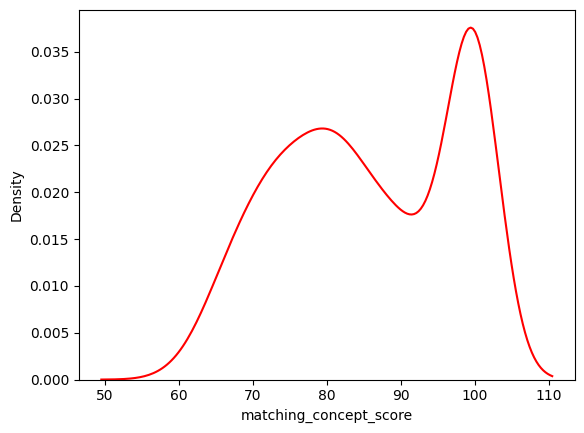

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

sns.distplot(fuzzyDf.matching_concept_score, hist=False, color='red', ax=ax)

### Merge the mapping file and the vocabulary file

In [37]:
import pandas as pd

mergedDf = pd.merge(sourceDf, snomedConditionDf, left_on='conceptId', right_on='concept_id', how='left')\
    .merge(medcatDf, left_on=['sourceName', 'sourceValueCode'], right_on=['source_concept_name', 'source_concept_id'])\
        .merge(usagiDf.add_suffix('_usagi'), left_on=['sourceName', 'sourceValueCode'], right_on=['sourceName_usagi', 'sourceCode_usagi'])\
            .merge(fuzzyDf.add_suffix('_fuzzy'), left_on=['sourceValueCode', 'sourceName'], right_on=['source_concept_id_fuzzy', 'source_concept_name_fuzzy'])
mergedDf

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,...,targetConceptClassId_usagi,targetConceptCode_usagi,targetValidStartDate_usagi,targetValidEndDate_usagi,targetInvalidReason_usagi,source_concept_id_fuzzy,source_concept_name_fuzzy,matching_concept_name_fuzzy,matching_concept_id_fuzzy,matching_concept_score_fuzzy
0,20002,diabetes,1220,diabetes,NaN,23996,NaN,0.8904300332069397,APPROVED,Vaclav,...,Clinical Finding,714628002,20160131,20991231,NaN,1220,diabetes,Prediabetes,37018196,84
1,20002,fracture hand,1638,fracture hand,NaN,441,NaN,0.8478937149047852,APPROVED,Vaclav,...,Clinical Finding,20511007,20020131,20991231,NaN,1638,fracture hand,Fracture of hand,4071876,90
2,20002,uterine problem,1552,uterine problem,NaN,91,NaN,0.7672346234321594,APPROVED,Vaclav,...,Clinical Finding,55607006,20020131,20991231,NaN,1552,uterine problem,Uterine prolapse,4092565,84
3,20002,asbestosis,1120,asbestosis,NaN,208,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,22607003,20020131,20991231,NaN,1120,asbestosis,Asbestosis,256450,100
4,20002,haemophilia,1328,haemophilia,NaN,78,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,90935002,20020131,20991231,NaN,1328,haemophilia,Hemophilia,4236898,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,20002,endometriosis,1402,endometriosis,NaN,4533,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,129103003,20020131,20991231,NaN,1402,endometriosis,Endometritis,4302765,88
442,20002,bell's palsy/facial nerve palsy,1250,bell's palsy/facial nerve palsy,NaN,588,NaN,0.6373665928840637,APPROVED,Vaclav,...,Clinical Finding,193093009,20020131,20991231,NaN,1250,bell's palsy/facial nerve palsy,Congenital facial nerve palsy,4048018,70
443,20002,female infertility,1403,female infertility,NaN,674,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,6738008,20020131,20991231,NaN,1403,female infertility,Female infertility,201909,100
444,20002,male infertility,1404,male infertility,NaN,38,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,2904007,20020131,20991231,NaN,1404,male infertility,Male infertility,198197,100


## Data Exploration (EDA)

### Mapping Status Counts

In [38]:
mergedDf.mappingStatus.value_counts()

APPROVED    351
FLAGGED      94
IGNORED       1
Name: mappingStatus, dtype: int64

In [39]:
mergedDf[mergedDf.mappingStatus == 'APPROVED'].sourceFrequency.apply(int).sum()/mergedDf.sourceFrequency.apply(int).sum()*100

83.91205161455127

In [40]:
mergedDf[mergedDf.mappingStatus == 'FLAGGED']

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,...,targetConceptClassId_usagi,targetConceptCode_usagi,targetValidStartDate_usagi,targetValidEndDate_usagi,targetInvalidReason_usagi,source_concept_id_fuzzy,source_concept_name_fuzzy,matching_concept_name_fuzzy,matching_concept_id_fuzzy,matching_concept_score_fuzzy
7,20002,pleural plaques (not known asbestosis),1595,pleural plaques (not known asbestosis),NaN,88,NaN,0.5092961192131042,FLAGGED,NaN,...,Clinical Finding,233659006,20020131,20991231,NaN,1595,pleural plaques (not known asbestosis),Asbestos-induced pleural plaque,4049971,75
9,20002,cervical problem,1553,cervical problem,NaN,56,NaN,0.6513034701347351,FLAGGED,NaN,...,Clinical Finding,26885007,20020131,20991231,NaN,1553,cervical problem,Cervical rib,79144,79
18,20002,fracture thumb,1640,fracture thumb,NaN,235,NaN,0.9132489562034607,FLAGGED,NaN,...,Clinical Finding,274160002,20020131,20991231,NaN,1640,fracture thumb,Open fracture of thumb,44811335,78
36,20002,sickle cell disease,1339,sickle cell disease,NaN,79,NaN,1.0,FLAGGED,NaN,...,Clinical Finding,417357006,20050731,20991231,NaN,1339,sickle cell disease,I-cell disease,4322172,85
39,20002,thyroid problem (not cancer),1224,thyroid problem (not cancer),NaN,1464,NaN,0.5772638916969299,FLAGGED,NaN,...,Clinical Finding,363478007,20020131,20991231,NaN,1224,thyroid problem (not cancer),Carcinoma of thyroid,40488900,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,20002,brain abscess/intracranial abscess,1245,brain abscess/intracranial abscess,NaN,79,NaN,0.6977694034576416,FLAGGED,NaN,...,Clinical Finding,27614006,20020131,20991231,NaN,1245,brain abscess/intracranial abscess,Epidural intracranial abscess,4105333,76
434,20002,pericardial problem,1080,pericardial problem,NaN,263,NaN,0.5747470855712891,FLAGGED,NaN,...,Clinical Finding,33070002,20020131,20991231,NaN,1080,pericardial problem,Ear problem,4114472,73
436,20002,other demyelinating disease (not multiple scle...,1397,other demyelinating disease (not multiple scle...,NaN,81,NaN,0.5503804087638855,FLAGGED,NaN,...,Clinical Finding,24700007,20020131,20991231,NaN,1397,other demyelinating disease (not multiple scle...,Exacerbation of multiple sclerosis,4102337,64
437,20002,spinal abscess,1248,spinal abscess,NaN,44,NaN,0.8829866647720337,FLAGGED,NaN,...,Clinical Finding,11980001000004100,20150731,20991231,NaN,1248,spinal abscess,Paraspinal abscess,46270013,88


/tmp/ipykernel_3310718/534836435.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mergedDf[mergedDf.mappingStatus == 'FLAGGED'].matchScore, hist=False, color='red', ax=ax)
/tmp/ipykernel_3310718/534836435.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mergedDf[mergedDf.

<AxesSubplot: xlabel='matchScore', ylabel='Density'>

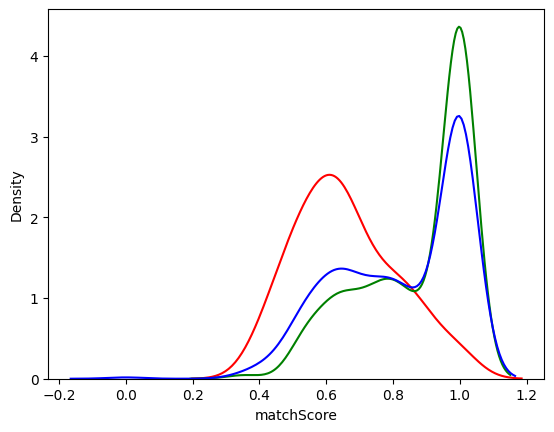

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

sns.distplot(mergedDf[mergedDf.mappingStatus == 'FLAGGED'].matchScore, hist=False, color='red', ax=ax)
sns.distplot(mergedDf[mergedDf.mappingStatus == 'APPROVED'].matchScore, hist=False, color='green', ax=ax)
sns.distplot(mergedDf.matchScore, hist=False, color='blue', ax=ax)

In [42]:
mergedDf['conceptId'] = mergedDf['conceptId'].apply(str)

In [43]:
mergedDf[mergedDf['conceptId'] != mergedDf['concept ID']]

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,...,targetConceptClassId_usagi,targetConceptCode_usagi,targetValidStartDate_usagi,targetValidEndDate_usagi,targetInvalidReason_usagi,source_concept_id_fuzzy,source_concept_name_fuzzy,matching_concept_name_fuzzy,matching_concept_id_fuzzy,matching_concept_score_fuzzy
0,20002,diabetes,1220,diabetes,NaN,23996,NaN,0.8904300332069397,APPROVED,Vaclav,...,Clinical Finding,714628002,20160131,20991231,NaN,1220,diabetes,Prediabetes,37018196,84
1,20002,fracture hand,1638,fracture hand,NaN,441,NaN,0.8478937149047852,APPROVED,Vaclav,...,Clinical Finding,20511007,20020131,20991231,NaN,1638,fracture hand,Fracture of hand,4071876,90
2,20002,uterine problem,1552,uterine problem,NaN,91,NaN,0.7672346234321594,APPROVED,Vaclav,...,Clinical Finding,55607006,20020131,20991231,NaN,1552,uterine problem,Uterine prolapse,4092565,84
7,20002,pleural plaques (not known asbestosis),1595,pleural plaques (not known asbestosis),NaN,88,NaN,0.5092961192131042,FLAGGED,NaN,...,Clinical Finding,233659006,20020131,20991231,NaN,1595,pleural plaques (not known asbestosis),Asbestos-induced pleural plaque,4049971,75
8,20002,grave's disease,1522,grave's disease,NaN,167,NaN,0.6568337082862854,APPROVED,Vaclav,...,Clinical Finding,82663009,20020131,20991231,NaN,1522,grave's disease,Graves' disease,4232076,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,20002,other demyelinating disease (not multiple scle...,1397,other demyelinating disease (not multiple scle...,NaN,81,NaN,0.5503804087638855,FLAGGED,NaN,...,Clinical Finding,24700007,20020131,20991231,NaN,1397,other demyelinating disease (not multiple scle...,Exacerbation of multiple sclerosis,4102337,64
437,20002,spinal abscess,1248,spinal abscess,NaN,44,NaN,0.8829866647720337,FLAGGED,NaN,...,Clinical Finding,11980001000004100,20150731,20991231,NaN,1248,spinal abscess,Paraspinal abscess,46270013,88
440,20002,cranial nerve problem/palsy,1249,cranial nerve problem/palsy,NaN,289,NaN,0.6480391621589661,APPROVED,Vaclav,...,Clinical Finding,73013002,20020131,20991231,NaN,1249,cranial nerve problem/palsy,O/E -cranial nerve -palsy -UMN,4062581,78
441,20002,endometriosis,1402,endometriosis,NaN,4533,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,129103003,20020131,20991231,NaN,1402,endometriosis,Endometritis,4302765,88


In [44]:
mergedDf[mergedDf['conceptId'] == mergedDf['concept ID']]

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,...,targetConceptClassId_usagi,targetConceptCode_usagi,targetValidStartDate_usagi,targetValidEndDate_usagi,targetInvalidReason_usagi,source_concept_id_fuzzy,source_concept_name_fuzzy,matching_concept_name_fuzzy,matching_concept_id_fuzzy,matching_concept_score_fuzzy
3,20002,asbestosis,1120,asbestosis,NaN,208,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,22607003,20020131,20991231,NaN,1120,asbestosis,Asbestosis,256450,100
4,20002,haemophilia,1328,haemophilia,NaN,78,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,90935002,20020131,20991231,NaN,1328,haemophilia,Hemophilia,4236898,95
5,20002,rheumatic fever,1479,rheumatic fever,NaN,1607,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,58718002,20020131,20991231,NaN,1479,rheumatic fever,Rheumatic fever,442313,100
6,20002,diabetes insipidus,1521,diabetes insipidus,NaN,29,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,15771004,20020131,20991231,NaN,1521,diabetes insipidus,Diabetes insipidus,30968,100
10,20002,dermatomyositis,1480,dermatomyositis,NaN,40,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,396230008,20030731,20991231,NaN,1480,dermatomyositis,Dermatomyositis,80182,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,20002,pneumonia,1398,pneumonia,NaN,8352,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,233604007,20020131,20991231,NaN,1398,pneumonia,Pneumonia,255848,100
439,20002,peptic ulcer,1400,peptic ulcer,NaN,540,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,13200003,20020131,20991231,NaN,1400,peptic ulcer,Peptic ulcer,4027663,100
442,20002,bell's palsy/facial nerve palsy,1250,bell's palsy/facial nerve palsy,NaN,588,NaN,0.6373665928840637,APPROVED,Vaclav,...,Clinical Finding,193093009,20020131,20991231,NaN,1250,bell's palsy/facial nerve palsy,Congenital facial nerve palsy,4048018,70
443,20002,female infertility,1403,female infertility,NaN,674,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,6738008,20020131,20991231,NaN,1403,female infertility,Female infertility,201909,100


In [45]:
mergedDf[mergedDf['conceptId'] != mergedDf['concept ID']][['sourceName', 'sourceValueCode', 'conceptId', 'concept_name', 'Concept Pretty Names', 'Concept Source Values']]

,sourceName,sourceValueCode,conceptId,concept_name,Concept Pretty Names,Concept Source Values
0,diabetes,1220,201820,Diabetes mellitus,None,None
1,fracture hand,1638,4071876,Fracture of hand,None,None
2,uterine problem,1552,4129177,Uterus problem,Problem,problem
7,pleural plaques (not known asbestosis),1595,4049971,Asbestos-induced pleural plaque,Pleural Plaque,pleural plaques
8,grave's disease,1522,4232076,Graves' disease,Disease,disease
...,...,...,...,...,...,...
436,other demyelinating disease (not multiple scle...,1397,4050856,Peripheral demyelinating neuropathy,Disease,disease
437,spinal abscess,1248,4037877,Spinal cord abscess,Abscess,abscess
440,cranial nerve problem/palsy,1249,441848,Cranial nerve disorder,Problem,problem
441,endometriosis,1402,433527,Endometriosis (clinical),None,None


In [46]:
mergedDf[mergedDf['targetConceptId_usagi'] == mergedDf['concept ID']]

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,...,targetConceptClassId_usagi,targetConceptCode_usagi,targetValidStartDate_usagi,targetValidEndDate_usagi,targetInvalidReason_usagi,source_concept_id_fuzzy,source_concept_name_fuzzy,matching_concept_name_fuzzy,matching_concept_id_fuzzy,matching_concept_score_fuzzy
2,20002,uterine problem,1552,uterine problem,NaN,91,NaN,0.7672346234321594,APPROVED,Vaclav,...,Clinical Finding,55607006,20020131,20991231,NaN,1552,uterine problem,Uterine prolapse,4092565,84
3,20002,asbestosis,1120,asbestosis,NaN,208,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,22607003,20020131,20991231,NaN,1120,asbestosis,Asbestosis,256450,100
4,20002,haemophilia,1328,haemophilia,NaN,78,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,90935002,20020131,20991231,NaN,1328,haemophilia,Hemophilia,4236898,95
5,20002,rheumatic fever,1479,rheumatic fever,NaN,1607,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,58718002,20020131,20991231,NaN,1479,rheumatic fever,Rheumatic fever,442313,100
6,20002,diabetes insipidus,1521,diabetes insipidus,NaN,29,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,15771004,20020131,20991231,NaN,1521,diabetes insipidus,Diabetes insipidus,30968,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,20002,pneumonia,1398,pneumonia,NaN,8352,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,233604007,20020131,20991231,NaN,1398,pneumonia,Pneumonia,255848,100
439,20002,peptic ulcer,1400,peptic ulcer,NaN,540,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,13200003,20020131,20991231,NaN,1400,peptic ulcer,Peptic ulcer,4027663,100
442,20002,bell's palsy/facial nerve palsy,1250,bell's palsy/facial nerve palsy,NaN,588,NaN,0.6373665928840637,APPROVED,Vaclav,...,Clinical Finding,193093009,20020131,20991231,NaN,1250,bell's palsy/facial nerve palsy,Congenital facial nerve palsy,4048018,70
443,20002,female infertility,1403,female infertility,NaN,674,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,6738008,20020131,20991231,NaN,1403,female infertility,Female infertility,201909,100


In [47]:
mergedDf[mergedDf['targetConceptId_usagi'] == mergedDf['conceptId']]

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,...,targetConceptClassId_usagi,targetConceptCode_usagi,targetValidStartDate_usagi,targetValidEndDate_usagi,targetInvalidReason_usagi,source_concept_id_fuzzy,source_concept_name_fuzzy,matching_concept_name_fuzzy,matching_concept_id_fuzzy,matching_concept_score_fuzzy
1,20002,fracture hand,1638,fracture hand,NaN,441,NaN,0.8478937149047852,APPROVED,Vaclav,...,Clinical Finding,20511007,20020131,20991231,NaN,1638,fracture hand,Fracture of hand,4071876,90
3,20002,asbestosis,1120,asbestosis,NaN,208,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,22607003,20020131,20991231,NaN,1120,asbestosis,Asbestosis,256450,100
4,20002,haemophilia,1328,haemophilia,NaN,78,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,90935002,20020131,20991231,NaN,1328,haemophilia,Hemophilia,4236898,95
5,20002,rheumatic fever,1479,rheumatic fever,NaN,1607,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,58718002,20020131,20991231,NaN,1479,rheumatic fever,Rheumatic fever,442313,100
6,20002,diabetes insipidus,1521,diabetes insipidus,NaN,29,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,15771004,20020131,20991231,NaN,1521,diabetes insipidus,Diabetes insipidus,30968,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,20002,endometriosis,1402,endometriosis,NaN,4533,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,129103003,20020131,20991231,NaN,1402,endometriosis,Endometritis,4302765,88
442,20002,bell's palsy/facial nerve palsy,1250,bell's palsy/facial nerve palsy,NaN,588,NaN,0.6373665928840637,APPROVED,Vaclav,...,Clinical Finding,193093009,20020131,20991231,NaN,1250,bell's palsy/facial nerve palsy,Congenital facial nerve palsy,4048018,70
443,20002,female infertility,1403,female infertility,NaN,674,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,6738008,20020131,20991231,NaN,1403,female infertility,Female infertility,201909,100
444,20002,male infertility,1404,male infertility,NaN,38,NaN,1.0,APPROVED,Vaclav,...,Clinical Finding,2904007,20020131,20991231,NaN,1404,male infertility,Male infertility,198197,100


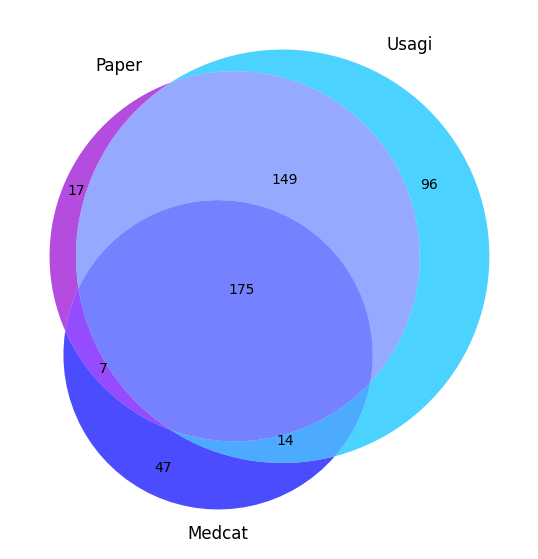

In [48]:
A = set(mergedDf[mergedDf.mappingStatus == 'APPROVED']['conceptId'])
B = set(mergedDf['targetConceptId_usagi'])
C = set(mergedDf['concept ID'])

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Paper', 'Usagi', 'Medcat')  
plt.figure(figsize=(7,7)) 
ax = plt.gca() 
venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=    
      ('darkviolet','deepskyblue','blue'),alpha=0.7)    
plt.show()

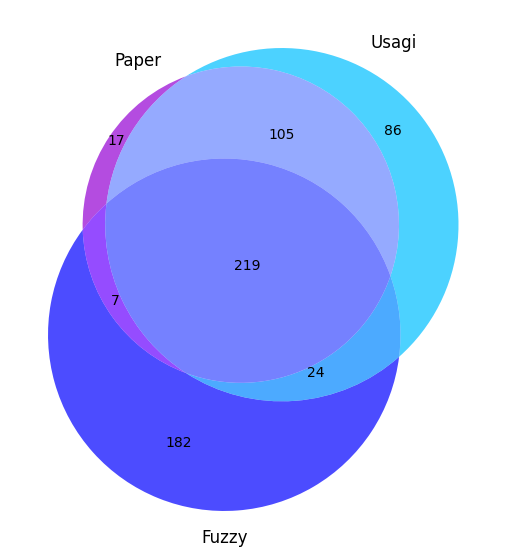

In [49]:
A = set(mergedDf[mergedDf.mappingStatus == 'APPROVED']['conceptId'])
B = set(mergedDf['targetConceptId_usagi'])
C = set(mergedDf['matching_concept_id_fuzzy'])

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Paper', 'Usagi', 'Fuzzy')
plt.figure(figsize=(7,7)) 
ax = plt.gca() 
venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=    
      ('darkviolet','deepskyblue','blue'),alpha=0.7)    
plt.show()

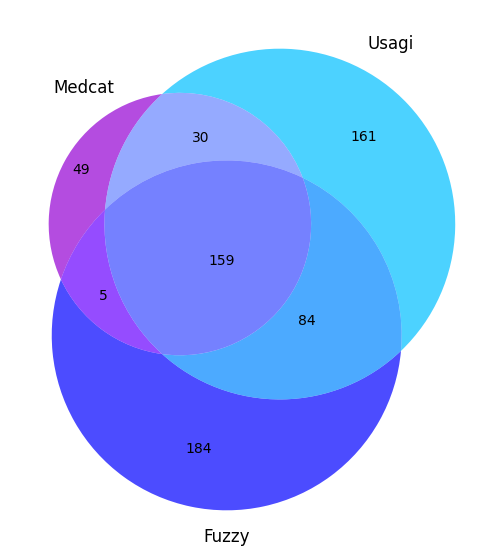

In [50]:
A = set(mergedDf['concept ID'])
B = set(mergedDf['targetConceptId_usagi'])
C = set(mergedDf['matching_concept_id_fuzzy'])

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Medcat', 'Usagi', 'Fuzzy')
plt.figure(figsize=(7,7)) 
ax = plt.gca() 
venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=    
      ('darkviolet','deepskyblue','blue'),alpha=0.7)    
plt.show()

In [51]:
mergedDf['matching_concept_score_fuzzy'] = mergedDf.matching_concept_score_fuzzy.apply(int)

/tmp/ipykernel_3310718/4240441623.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mergedDf['matching_concept_score_fuzzy'], hist=False, color='red', ax=ax)
/tmp/ipykernel_3310718/4240441623.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mergedDf[mergedDf['matching_conc

<AxesSubplot: xlabel='matching_concept_score_fuzzy', ylabel='Density'>

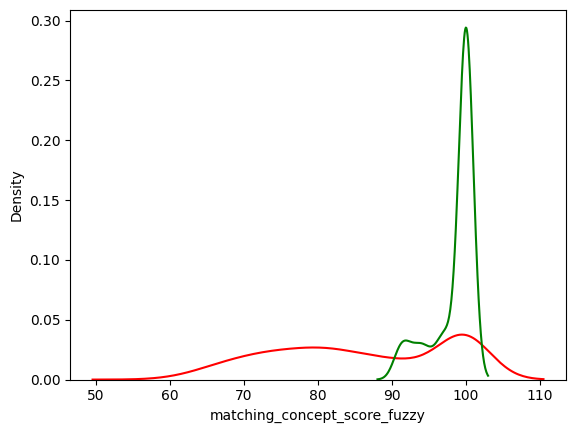

In [52]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

sns.distplot(mergedDf['matching_concept_score_fuzzy'], hist=False, color='red', ax=ax)
sns.distplot(mergedDf[mergedDf['matching_concept_score_fuzzy'] > 90].matching_concept_score_fuzzy, hist=False, color='green', ax=ax)
# sns.distplot(mergedDf.matchScore, hist=False, color='blue', ax=ax)

In [53]:
mergedDf['matchScore_usagi'] = mergedDf['matchScore_usagi'].apply(float)

/tmp/ipykernel_3310718/2071145768.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mergedDf.matchScore_usagi, hist=False, color='red', ax=ax)
/tmp/ipykernel_3310718/2071145768.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mergedDf[mergedDf['matchScore_usagi'] > 0.8].ma

<AxesSubplot: xlabel='matchScore_usagi', ylabel='Density'>

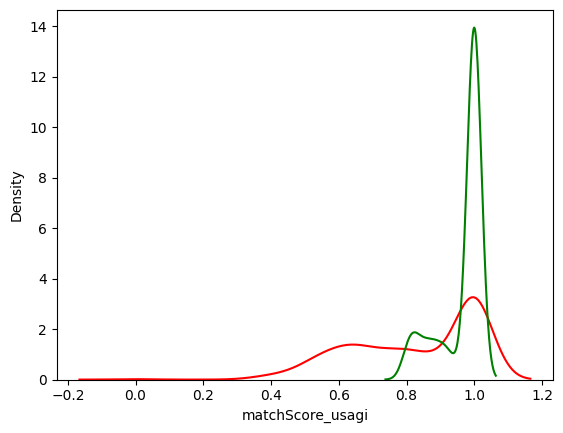

In [54]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

sns.distplot(mergedDf.matchScore_usagi, hist=False, color='red', ax=ax)
sns.distplot(mergedDf[mergedDf['matchScore_usagi'] > 0.8].matchScore_usagi, hist=False, color='green', ax=ax)
# sns.distplot(mergedDf.matchScore, hist=False, color='blue', ax=ax)

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

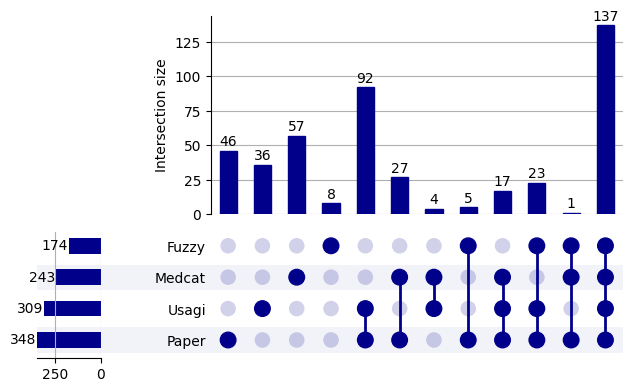

In [55]:
from upsetplot import from_contents, UpSet


upsetPlotData = from_contents({
    'Paper': set(mergedDf[mergedDf.mappingStatus == 'APPROVED']['conceptId']),
    'Fuzzy': set(mergedDf[mergedDf['matching_concept_score_fuzzy'] > 90].matching_concept_id_fuzzy),
    # 'Fuzzy': set(mergedDf.matching_concept_id_fuzzy),
    'Usagi': set(mergedDf[mergedDf['matchScore_usagi'] > 0.7].targetConceptId_usagi),
    'Medcat': set(mergedDf['concept ID'])
    })

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

## Majority Voting

In [79]:
mergedDf.loc[:, ['conceptId','matching_concept_id_fuzzy', 'targetConceptId_usagi', 'concept ID']]

,conceptId,matching_concept_id_fuzzy,targetConceptId_usagi,concept ID
0,201820,37018196,37018196,None
1,4071876,4071876,4071876,None
2,4129177,4092565,4206460,4206460
3,256450,256450,256450,256450
4,4236898,4236898,4236898,4236898
...,...,...,...,...
441,433527,4302765,433527,None
442,374923,4048018,374923,374923
443,201909,201909,201909,201909
444,198197,198197,198197,198197


In [92]:
mergedDf['support'] = mergedDf.apply(lambda x: ((1 if (x.conceptId == x.matching_concept_id_fuzzy) else 0) + (1 if (x.conceptId == x.targetConceptId_usagi) else 0) + (1 if (x.conceptId == x['concept ID']) else 0)), axis=1)

In [105]:
mergedDf.support.value_counts()

3    159
1    149
2     99
0     39
Name: support, dtype: int64

In [107]:
mergedDf['matching_concept_id_majority_voting'] = mergedDf.apply(lambda x: x.conceptId if (x.support > 1) else None, axis=1)

In [118]:
(mergedDf['matching_concept_id_majority_voting'] == mergedDf['conceptId']).sum()

258

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

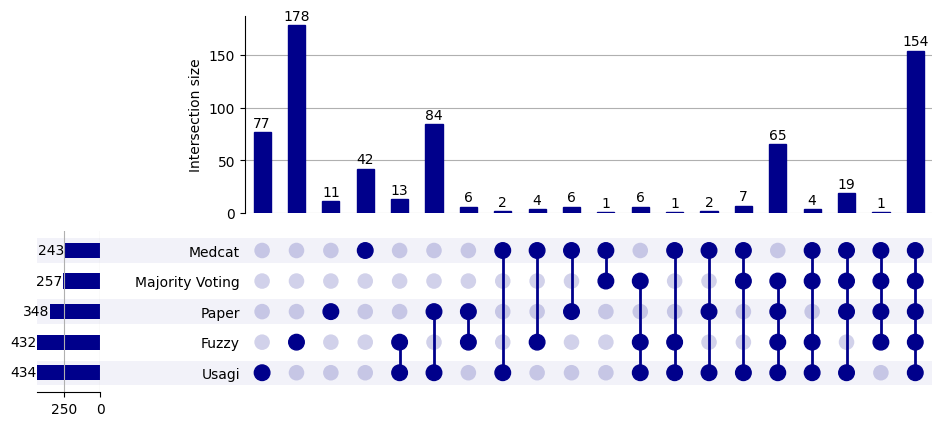

In [111]:
from upsetplot import from_contents, UpSet


upsetPlotData = from_contents({
    'Paper': set(mergedDf[mergedDf.mappingStatus == 'APPROVED']['conceptId']),
    'Fuzzy': set(mergedDf.matching_concept_id_fuzzy),
    'Majority Voting': set(mergedDf.matching_concept_id_majority_voting),
    'Usagi': set(mergedDf.targetConceptId_usagi),
    'Medcat': set(mergedDf['concept ID'])
    })

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

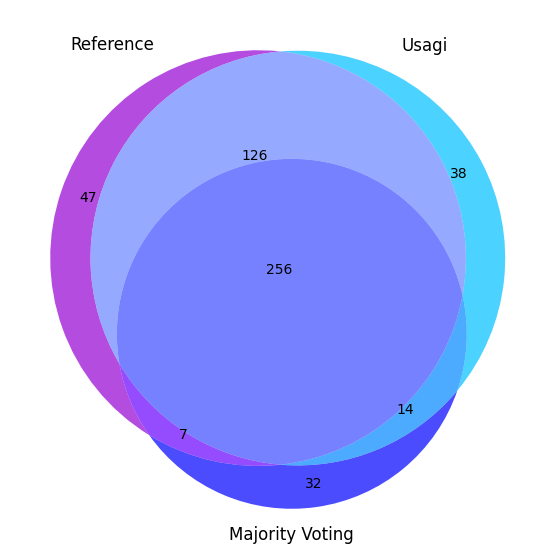

In [156]:
A = set(mergedDf['conceptId'])
B = set(mergedDf['targetConceptId_usagi'])
C = set(mergedDf['matching_concept_id_majority_voting'])

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Reference', 'Usagi', 'Majority Voting')
plt.figure(figsize=(7,7)) 
ax = plt.gca() 
venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=    
      ('darkviolet','deepskyblue','blue'),alpha=0.7)    
plt.show()

/home/yram0006/phd/chapter_1/workspace/EHRQC/notebooks/python/.venv/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


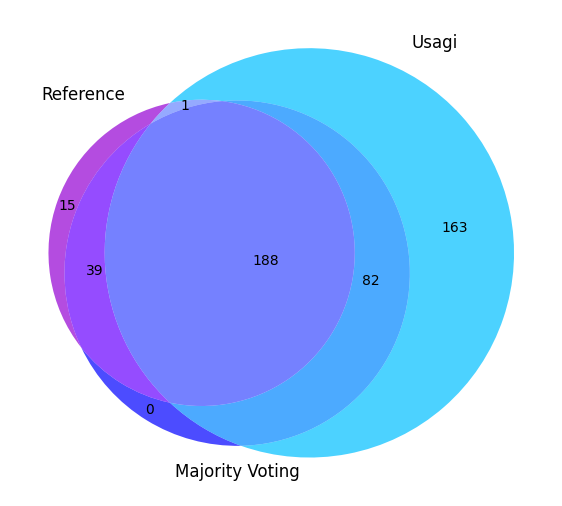

In [155]:
A = set(mergedDf['concept ID'])
B = set(mergedDf['targetConceptId_usagi'])
C = set(mergedDf['matching_concept_id_majority_voting'])

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Reference', 'Usagi', 'Majority Voting')
plt.figure(figsize=(7,7)) 
ax = plt.gca() 
venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=    
      ('darkviolet','deepskyblue','blue'),alpha=0.7)    
plt.show()

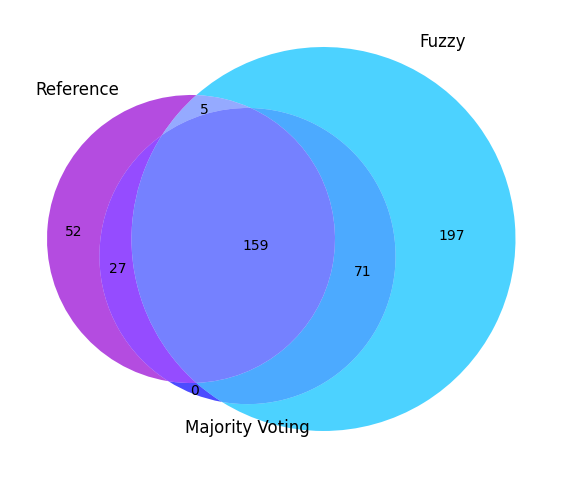

In [116]:
A = set(mergedDf['concept ID'])
B = set(mergedDf['matching_concept_id_fuzzy'])
C = set(mergedDf['matching_concept_id_majority_voting'])

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Reference', 'Fuzzy', 'Majority Voting')
plt.figure(figsize=(7,7)) 
ax = plt.gca() 
venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=    
      ('darkviolet','deepskyblue','blue'),alpha=0.7)    
plt.show()

In [150]:
from collections import Counter
def getMajorityId(x):
    countsDict = dict(Counter([x['concept ID'], x['matching_concept_id_fuzzy'], x['targetConceptId_usagi']]))
    sortedValues = list(countsDict.values())
    sortedValues.sort(reverse=True)
    return list(countsDict.keys())[list(countsDict.values()).index(sortedValues[0])]

mergedDf['matching_concept_id_majority_voting'] = mergedDf.apply(lambda x: getMajorityId(x), axis=1)

In [151]:
mergedDf['matching_concept_id_majority_voting'].count()

359

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

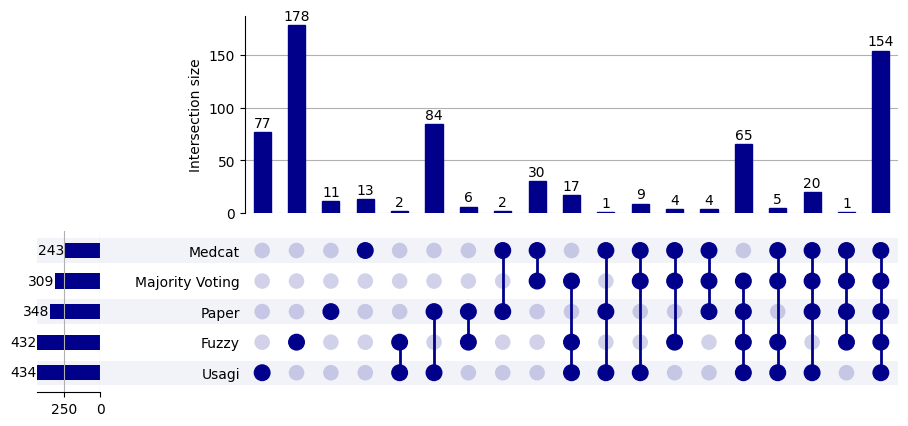

In [152]:
from upsetplot import from_contents, UpSet


upsetPlotData = from_contents({
    'Paper': set(mergedDf[mergedDf.mappingStatus == 'APPROVED']['conceptId']),
    'Fuzzy': set(mergedDf.matching_concept_id_fuzzy),
    'Majority Voting': set(mergedDf.matching_concept_id_majority_voting),
    'Usagi': set(mergedDf.targetConceptId_usagi),
    'Medcat': set(mergedDf['concept ID'])
    })

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

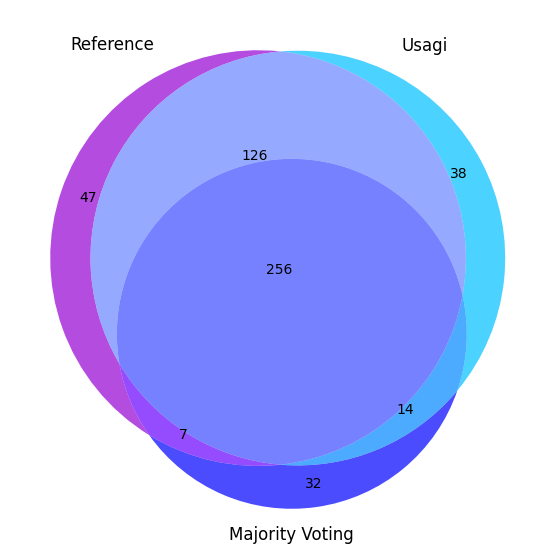

In [153]:
A = set(mergedDf['conceptId'])
B = set(mergedDf['targetConceptId_usagi'])
C = set(mergedDf['matching_concept_id_majority_voting'])

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Reference', 'Usagi', 'Majority Voting')
plt.figure(figsize=(7,7)) 
ax = plt.gca() 
venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=    
      ('darkviolet','deepskyblue','blue'),alpha=0.7)    
plt.show()

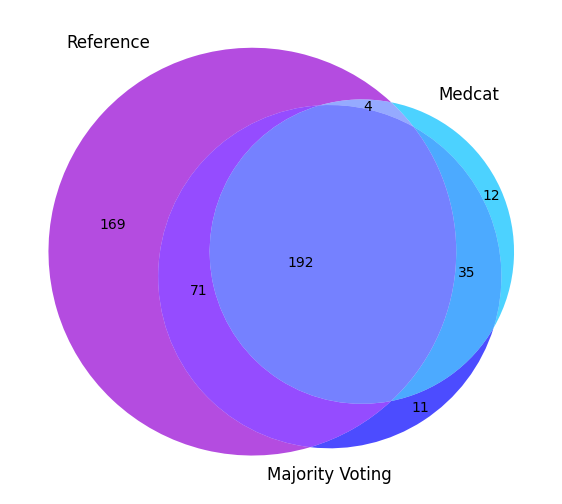

In [157]:
A = set(mergedDf['conceptId'])
B = set(mergedDf['concept ID'])
C = set(mergedDf['matching_concept_id_majority_voting'])

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Reference', 'Medcat', 'Majority Voting')
plt.figure(figsize=(7,7)) 
ax = plt.gca() 
venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=    
      ('darkviolet','deepskyblue','blue'),alpha=0.7)    
plt.show()

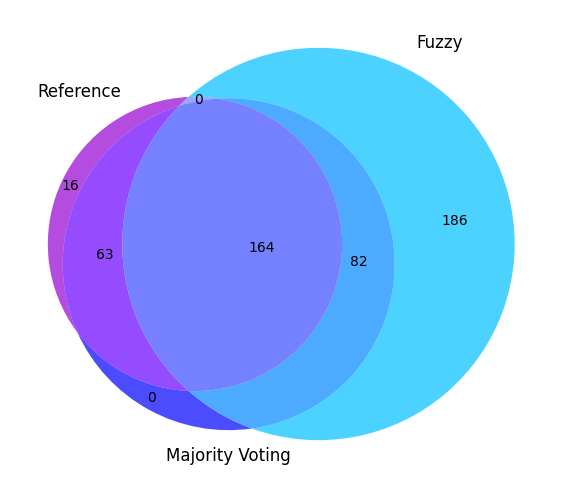

In [158]:
A = set(mergedDf['concept ID'])
B = set(mergedDf['matching_concept_id_fuzzy'])
C = set(mergedDf['matching_concept_id_majority_voting'])

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Reference', 'Fuzzy', 'Majority Voting')
plt.figure(figsize=(7,7)) 
ax = plt.gca() 
venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=    
      ('darkviolet','deepskyblue','blue'),alpha=0.7)    
plt.show()